<a href="https://colab.research.google.com/github/Srijan-Rai/Appliane-Energy-Prediction/blob/main/ApplianceEnergyPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Appliance Energy Prediction**

---
In the modern era of development, energy plays a vital role for various households and industries. In today’s time, there are many places, especially in the developing world where there are outages. Hence having proper knowledge of energy consumption by various household appliances could help us to tackle such problems.

In this project, we will be building a Machine Learning model to predict the energy consumption of various appliances in an apartment.

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters.

Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru) and merged with the experimental data sets using the date and time column. 

Two random variables have been included in the data set for testing the regression models and to filter out non-predictive attributes
(parameters).

The approach taken to achieve the objective of the project:


*   Understanding the data
*   Data Preprocessing
*   Exploratory Data Analysis
*   Building different machine learning models.
*   Choosing the best model based on the necessary evaluation metrics.






## Problem Statement 
In this project we are provided with a dataset, where we need to predict the Appliance energy consumption for a house based on various features provided in the dataset. In order to achieve this, we need to develop a supervised learning model using regression algorithms. 

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style = "darkgrid")
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

## **Reading and understanding the data**

In [ ]:
# mounting the drive to obtain the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the dataset
path = "/content/drive/My Drive/Colab Notebooks/Appliance Energy Prediction(Regression Project)/data_application_energy.csv"
df= pd.read_csv(path)

In [ ]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

## **Dataset Columns**
The dataset consists of the following columns:


* **date** - time year-month-day hour:minute:second
* **Appliances** - energy use in Wh (Dependent variable)
* **lights** - energy use of light fixtures in the house in Wh
* **T1** - Temperature in kitchen area, in Celsius
* **RH1** - Humidity in kitchen area, in %
* **T2** - Temperature in living room area, in Celsius
* **RH2** - Humidity in living room area, in %
* **T3** - Temperature in laundry room area
* **RH3** - Humidity in laundry room area, in %
* **T4** - Temperature in office room, in Celsius
* **RH4** - Humidity in office room, in %
* **T5** - Temperature in bathroom, in Celsius
* **RH5** - Humidity in bathroom, in %
* **T6** - Temperature outside the building (north side), in Celsius
* **RH6** - Humidity outside the building (north side), in %
* **T7** - Temperature in ironing room, in Celsius
* **RH7** - Humidity in ironing room, in %
* **T8** - Temperature in teenager room 2, in Celsius
* **RH8** - Humidity in teenager room 2, in %
* **T9** - Temperature in parents room, in Celsius
* **RH9** - Humidity in parents room, in %
* **T_out** - Temperature outside (from Chievres weather station), in Celsius
* **Pressure** - (from Chievres weather station), in mm Hg RHout
* **Humidity** - outside (from Chievres weather station), in %
* **Wind speed** - (from Chievres weather station), in m/s
* **Visibility** - (from Chievres weather station), in km
* **Tdewpoint** - (from Chievres weather station), Â°C
* **rv1** - Random variable 1, nondimensional
* **rv2** - Random variable 2, nondimensional

## **Exploratory Data Analysis**

### **Head and Tail**

In [ ]:
# Head of the data frame
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
# Tail of the data
df.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


### **Data Exploration**

In [ ]:
df.shape

(19735, 29)

We can see that there are 19735 rows and 29 columns in the data provided.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

We can split the data frame into humidity, temperature, and other features to study the data more clearly.

In [ ]:
temperature = df[['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9','T_out']]
humidity = df[['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9','RH_out']]
other_features = df[["Appliances","lights",'Press_mm_hg','Windspeed','Visibility','Tdewpoint','rv1','rv2']]

In [ ]:
temperature.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T_out
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,21.686571,20.341219,22.267611,20.855335,19.592106,7.910939,20.267106,22.029107,19.485828,7.411665
std,1.606066,2.192974,2.006111,2.042884,1.844623,6.090347,2.109993,1.956162,2.014712,5.317409
min,16.790000,16.100000,17.200000,15.100000,15.330000,-6.065000,15.390000,16.306667,14.890000,-5.000000
25%,20.760000,18.790000,20.790000,19.530000,18.277500,3.626667,18.700000,20.790000,18.000000,3.666667
50%,21.600000,20.000000,22.100000,20.666667,19.390000,7.300000,20.033333,22.100000,19.390000,6.916667
75%,22.600000,21.500000,23.290000,22.100000,20.619643,11.256000,21.600000,23.390000,20.600000,10.408333
max,26.260000,29.856667,29.236000,26.200000,25.795000,28.290000,26.000000,27.230000,24.500000,26.100000


* We can see the temperatures across various rooms inside the apartment are similar 
*T6 and T_out which are temperatures outside the building has a high variance compared to the apartment rooms, this might be due to changes in the weather conditions.

In [ ]:
humidity.describe()

,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,RH_out
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,40.259739,40.420420,39.242500,39.026904,50.949283,54.609083,35.388200,42.936165,41.552401,79.750418
std,3.979299,4.069813,3.254576,4.341321,9.022034,31.149806,5.114208,5.224361,4.151497,14.901088
min,27.023333,20.463333,28.766667,27.660000,29.815000,1.000000,23.200000,29.600000,29.166667,24.000000
25%,37.333333,37.900000,36.900000,35.530000,45.400000,30.025000,31.500000,39.066667,38.500000,70.333333
50%,39.656667,40.500000,38.530000,38.400000,49.090000,55.290000,34.863333,42.375000,40.900000,83.666667
75%,43.066667,43.260000,41.760000,42.156667,53.663333,83.226667,39.000000,46.536000,44.338095,91.666667
max,63.360000,56.026667,50.163333,51.090000,96.321667,99.900000,51.400000,58.780000,53.326667,100.000000


*   We can see the humidity of the rooms are almost similar to each other
*   RH_6 and RH_out which are the  humidity outside the building may have some effect of change in weather conditions



In [ ]:
other_features.describe()

,Appliances,lights,Press_mm_hg,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,755.522602,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,7.399441,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,729.300000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,750.933333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,756.100000,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,760.933333,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,772.300000,14.000000,66.000000,15.500000,49.996530,49.996530


* We can see the appliances has an unusually high maximum value. This might contain some outliers
* 75% or more values of lights are 0, and hence this column may not play any significant role in building the regression model. Hence dropping this feature would be a good decision 

In [ ]:
# Dropping lights column
df.drop("lights",axis=1,inplace=True)

In [ ]:
# Find duplicates in the dataframe
print(df.duplicated().value_counts())

False    19735
dtype: int64


There are no duplicate values in the dataframe

In [ ]:
# checking the presence of null values in the data frame
print(df.isna().sum())

date           0
Appliances     0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


### **Outlier Detection**

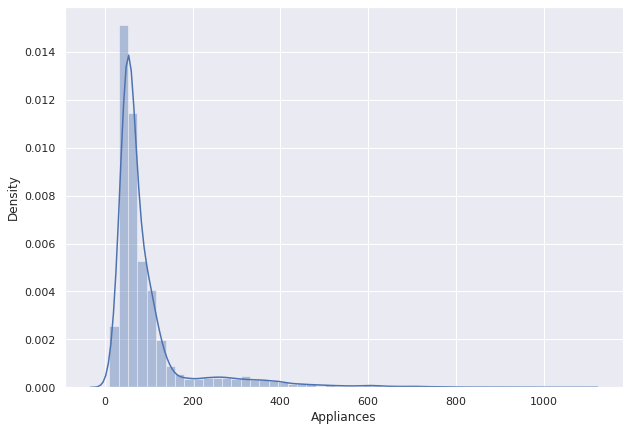

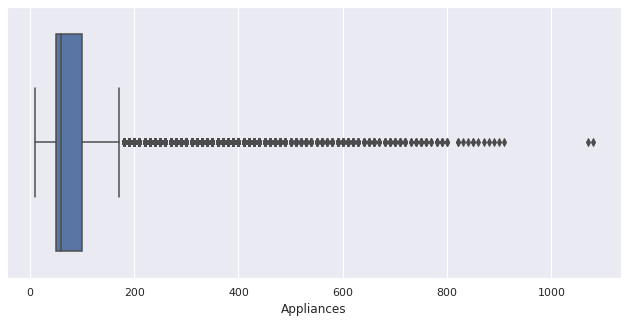

In [ ]:
# Detecting outliers in appliances
plt.figure(figsize=(10,7))
sns.distplot(df['Appliances'])
plt.figure(figsize=(11,5))
sns.boxplot(data=df, x='Appliances')



As we can see from the above distributions of the appliance energy, we can say that the appliance energy level above 400 would be considered an outlier and would be removed from the data frame

In [ ]:
# Remove outliers in appliances i.e values above 400
df = df[df["Appliances"]<400]

In [ ]:
# Checking for negative appliance energy
df[df['Appliances']<0]

,date,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2


Let us now check the distribution of the different features provided in the dataset to get some useful insights 

### **Data Distribution**

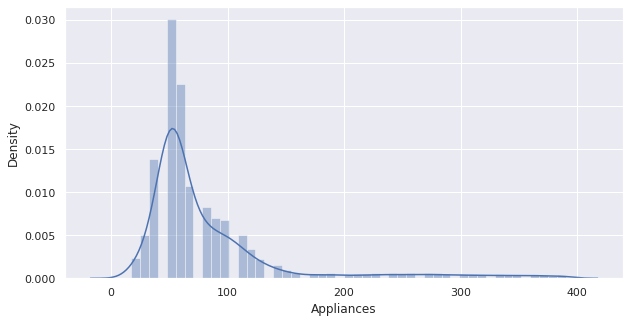

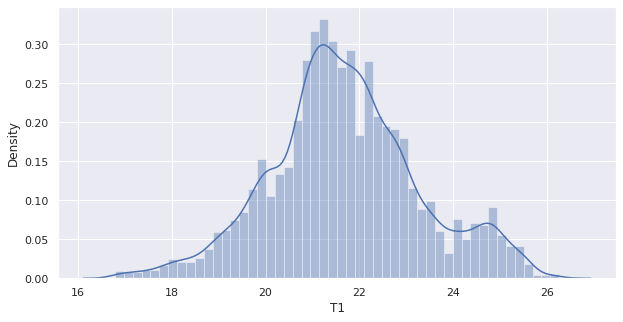

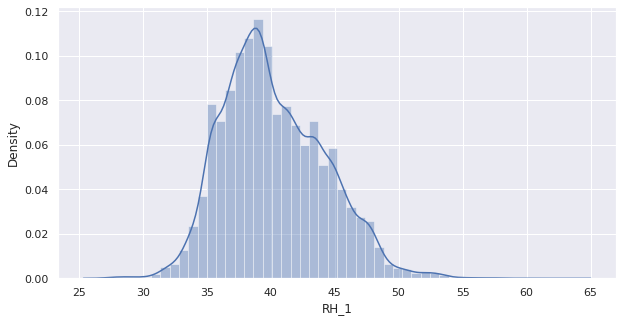

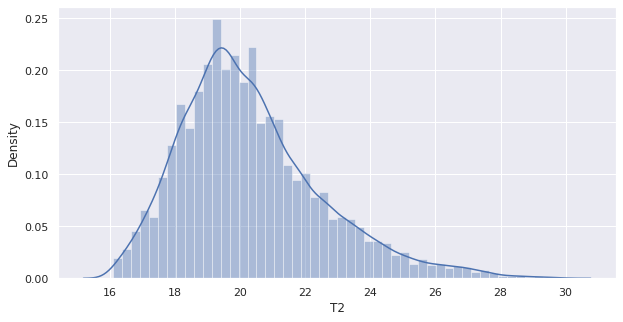

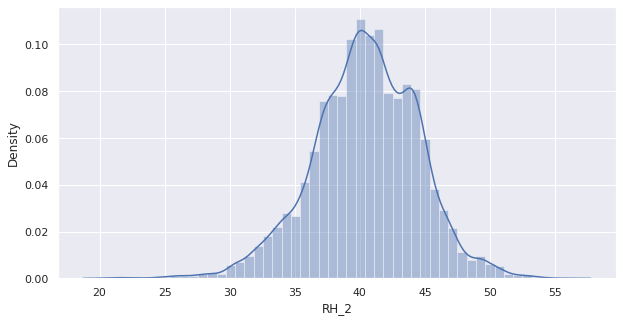

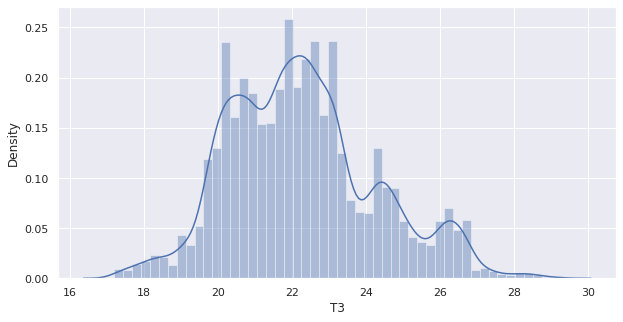

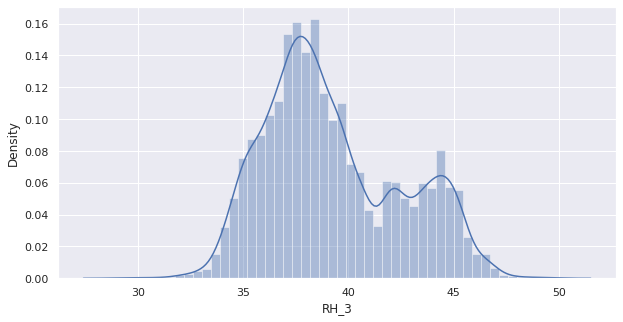

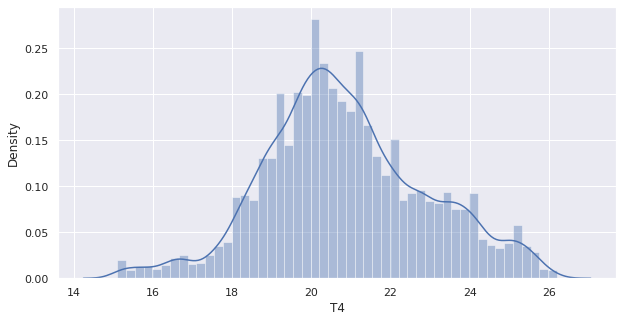

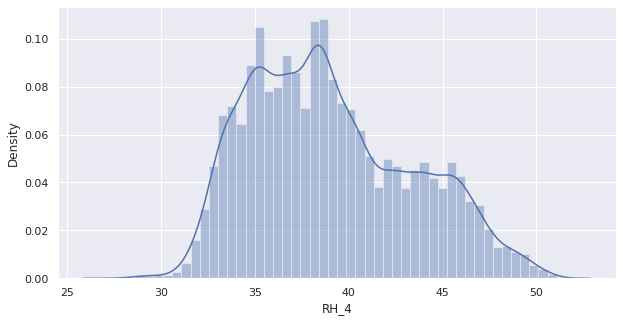

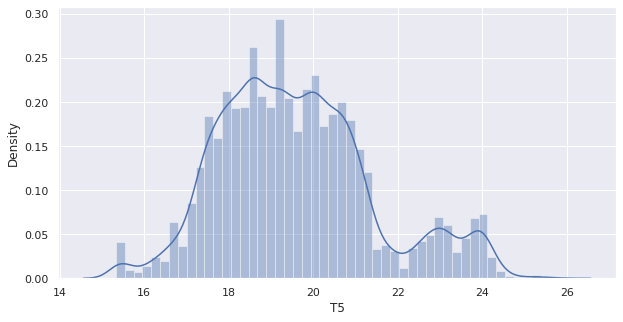

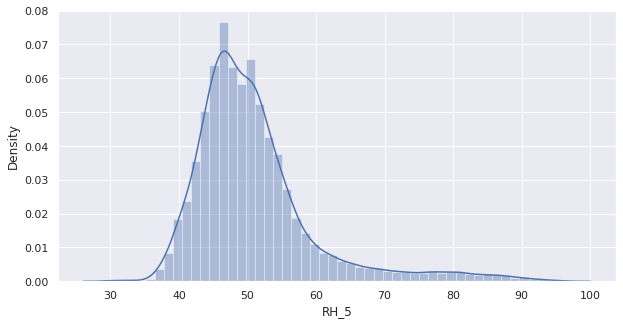

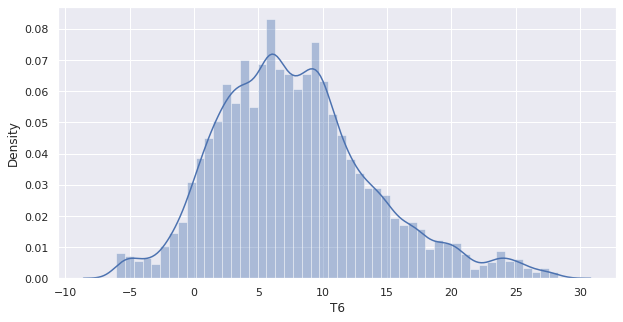

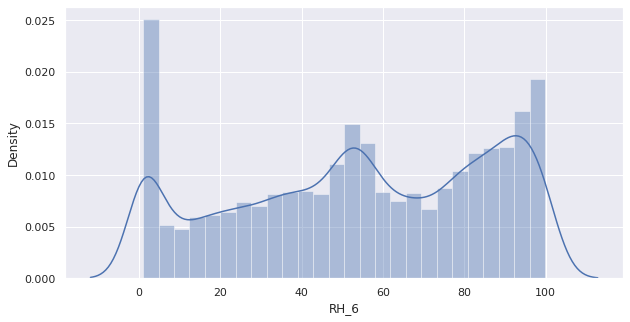

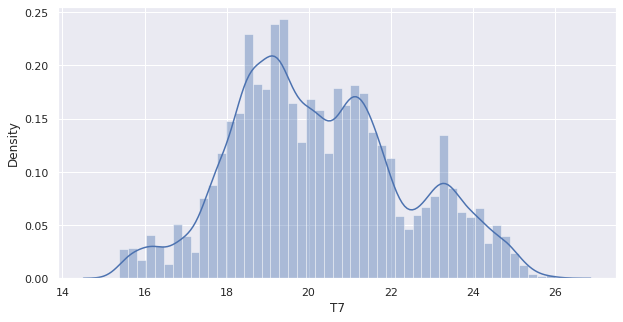

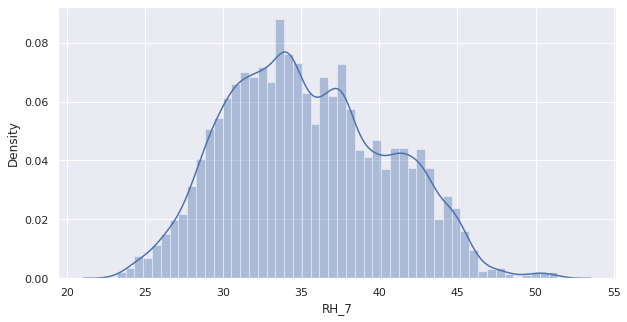

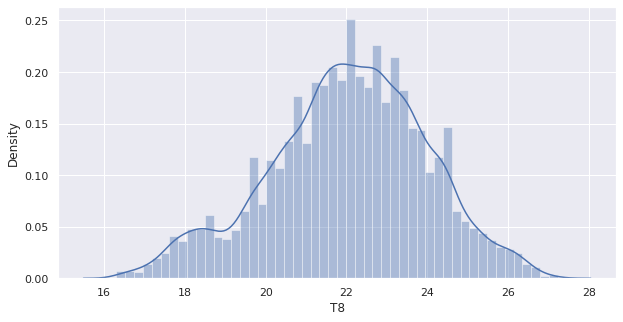

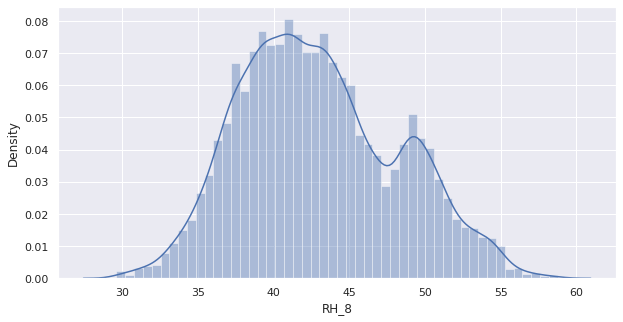

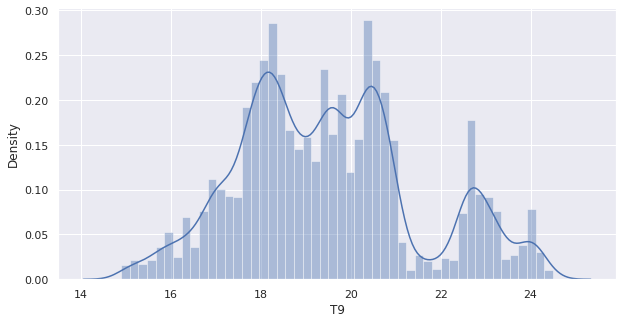

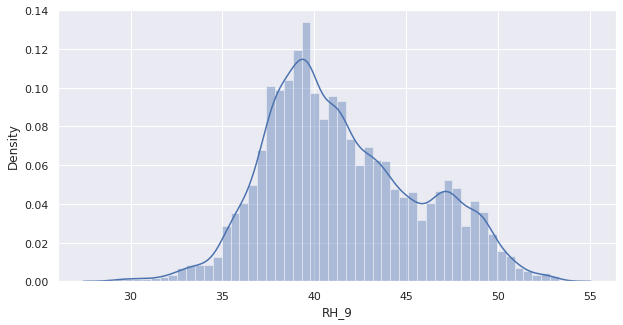

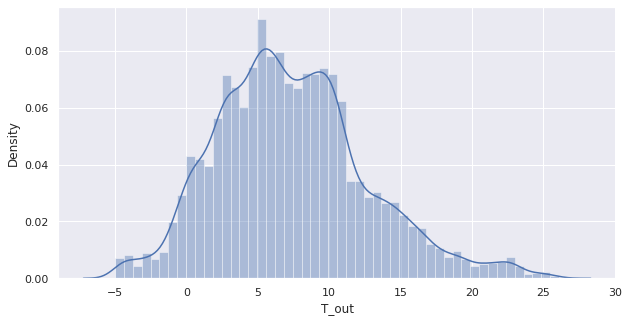

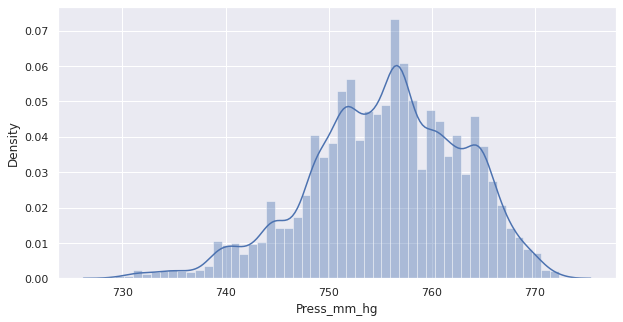

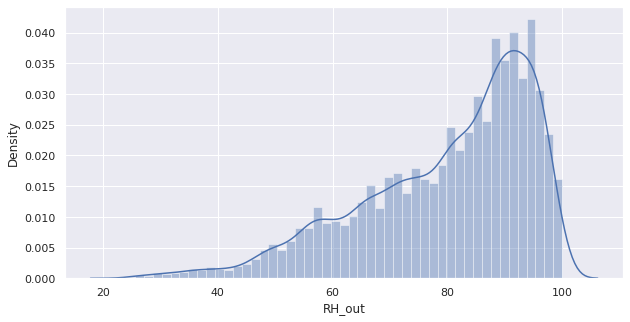

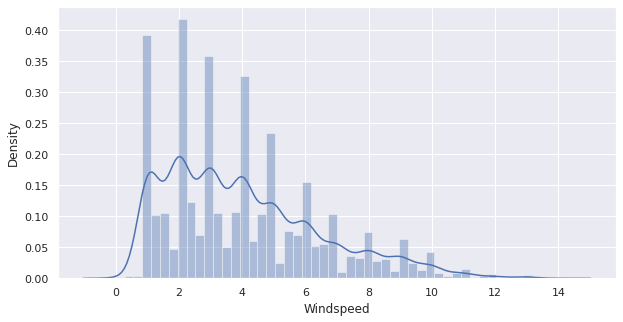

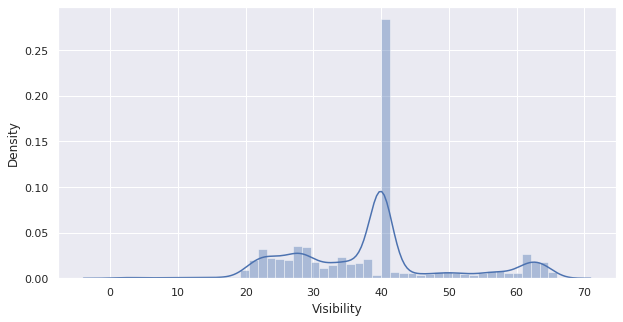

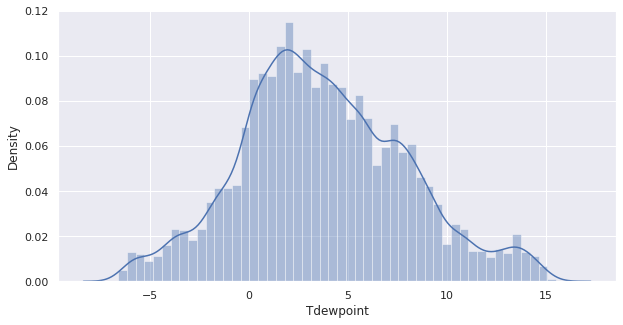

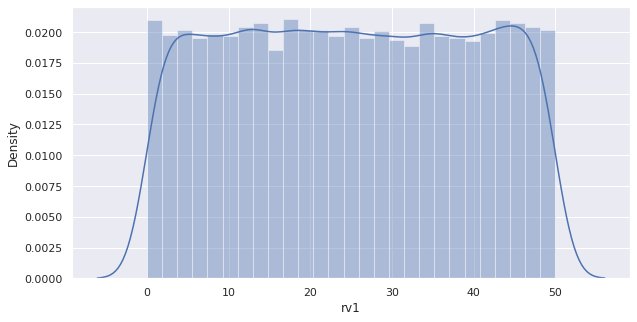

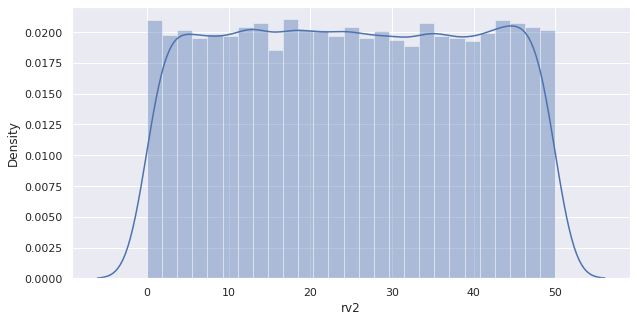

In [ ]:
# Using distplot from seaborn to visualize data distribution
for col in df.describe().columns:
  plt.figure(figsize=(10,5))
  sns.distplot(df[col])
  

Observations from the above data distribution plots:
*   All the temperatures follow almost a normal distribution pattern, Except T9.
*   Except RH_6 and RH_out, the rest of the humidity columns follow a normal distribution.
* The Appliance column has a positively skewed distribution. Most of the energy usage is between 0 Wh to 100Wh.
*   The Windspeed shows a positively skewed distribution.
*   The two random variables follow a continuous distribution.




